In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd

# Carregar os dados
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Mostrar as primeiras linhas dos dados de treino
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

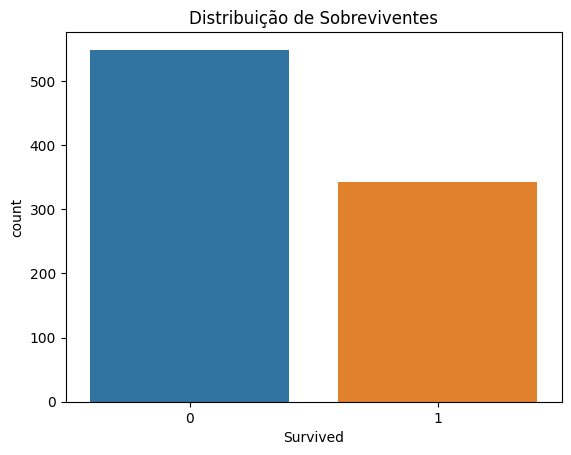

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de sobreviventes
sns.countplot(x='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


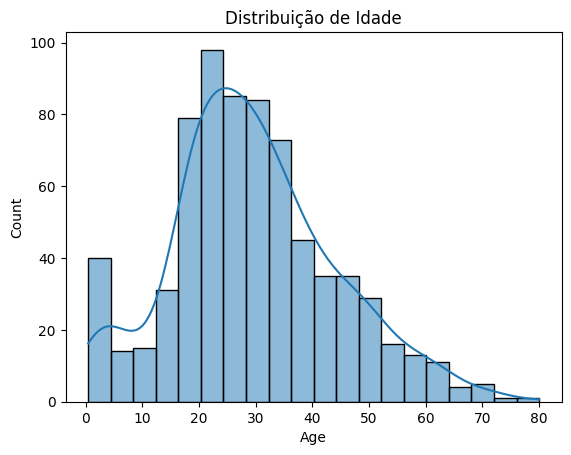

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


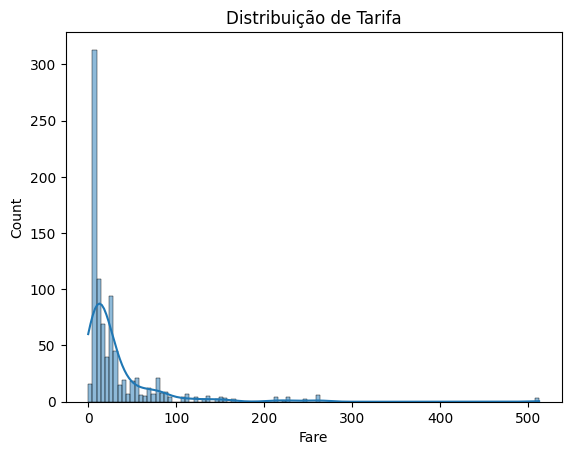

In [7]:
# Distribuição de idade
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Distribuição de Idade')
plt.show()

# Distribuição de tarifa
sns.histplot(train_data['Fare'], kde=True)
plt.title('Distribuição de Tarifa')
plt.show()


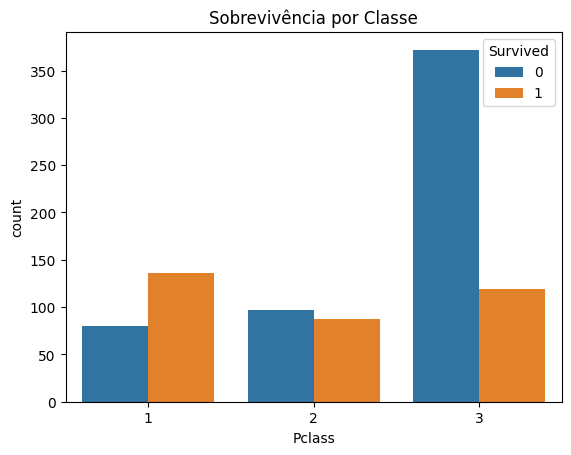

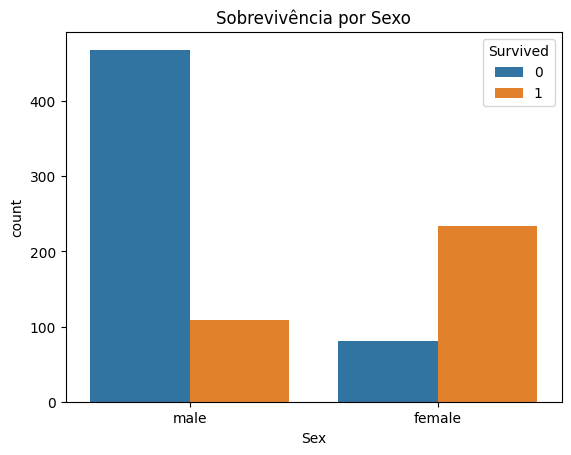

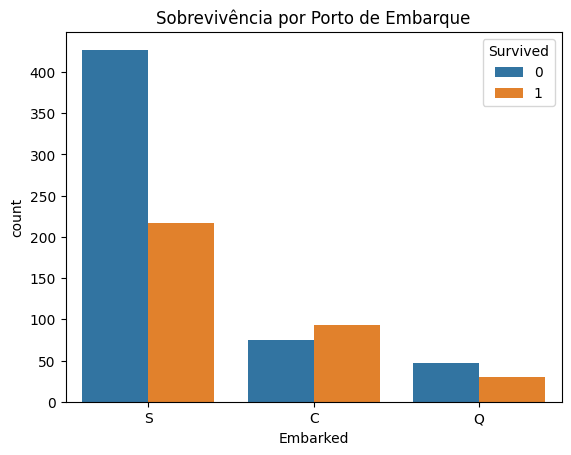

In [8]:
# Sobrevivência por classe de passageiro
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Sobrevivência por Classe')
plt.show()

# Sobrevivência por sexo
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Sobrevivência por Sexo')
plt.show()

# Sobrevivência por porto de embarque
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Sobrevivência por Porto de Embarque')
plt.show()


In [9]:
#Tratamento e processamento dos dados 

In [10]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

<ipython-input-10-f050d84d189b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [11]:
# Preencher valores nulos com o valor mais frequente (moda)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


<ipython-input-11-bd75546bd0a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [12]:
train_data.drop('Cabin',axis=1, inplace=True)
train_data.drop('Name',axis=1, inplace=True)
train_data.drop('Ticket',axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=False)

In [14]:
# Converter True/False para 0/1 nas colunas de Embarked
train_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)


In [15]:
# Converter 'Sex' para 0 e 1 (0 para male, 1 para female)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})


In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [17]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [18]:
# Definir as colunas que serão usadas como features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Definir a variável target (rótulo)
target = 'Survived'


In [19]:
X_train = train_data[features]
y_train = train_data[target]


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
#tratando o dataset de test 

In [22]:
test_data.drop('Cabin',axis=1, inplace=True)
test_data.drop('Name',axis=1, inplace=True)
test_data.drop('Ticket',axis=1, inplace=True)

In [23]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=False)

In [25]:
# Converter True/False para 0/1 nas colunas de Embarked
test_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = test_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)


In [26]:
# Converter 'Sex' para 0 e 1 (0 para male, 1 para female)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [27]:
# Verificar valores NaN em test_data
print(test_data.isnull().sum())


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [28]:
# Preencher valores NaN com a mediana
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Verificar se ainda há valores NaN
print(test_data.isnull().sum())


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


<ipython-input-28-fdc5157624de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-28-fdc5157624de>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [29]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir features e target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Separar features e target no conjunto de treino
X = train_data[features]
y = train_data[target]

# Dividir em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avaliar o modelo
accuracy = accuracy_score(y_val, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')


Acurácia do modelo: 0.8101


In [31]:
# Fazer previsões no conjunto de teste
test_predictions = model.predict(test_data[features])

# Criar um DataFrame para submissão
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Salvar como CSV (sem índice)
submission.to_csv('submission.csv', index=False)

print("Arquivo submission.csv criado com sucesso!")


Arquivo submission.csv criado com sucesso!


In [32]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [33]:
# Carregar o arquivo
df = pd.read_csv("submission.csv")

# Contar as linhas
print(f"Total de linhas: {len(df)}")


Total de linhas: 418
